In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('monthly-car-sales.csv', index_col = 0, parse_dates = True, date_parser = lambda dates: pd.datetime.strptime(dates,'%Y-%m'))

In [7]:
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [8]:
data.dtypes

Sales    int64
dtype: object

In [9]:
data.index.dtype

dtype('<M8[ns]')

In [10]:
data.tail()

,Sales
Month,
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
1968-11-01,17180
1968-12-01,14577


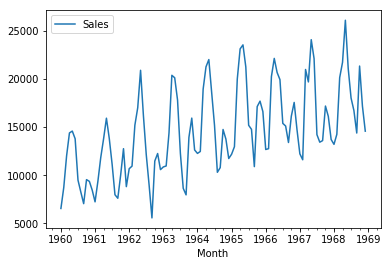

In [13]:
data.plot()

In [12]:
%matplotlib inline

In [16]:
data.values.reshape(-1,12)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [19]:
cols = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_year = pd.DataFrame(data.values.reshape(-1,12), index=range(1960,1969), columns=cols)
data_year

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,6550,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456
1961,7237,9374,11837,13784,15926,13821,11143,7975,7610,10015,12759,8816
1962,10677,10947,15200,17010,20900,16205,12143,8997,5568,11474,12256,10583
1963,10862,10965,14405,20379,20128,17816,12268,8642,7962,13932,15936,12628
1964,12267,12470,18944,21259,22015,18581,15175,10306,10792,14752,13754,11738
1965,12181,12965,19990,23125,23541,21247,15189,14767,10895,17130,17697,16611
1966,12674,12760,20249,22135,20677,19933,15388,15113,13401,16135,17562,14720
1967,12225,11608,20985,19692,24081,22114,14220,13434,13598,17187,16119,13713
1968,13210,14251,20139,21725,26099,21084,18024,16722,14385,21342,17180,14577


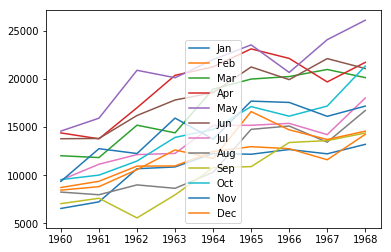

In [25]:
data_year.plot()

In [21]:
data_year.index.values

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968])

In [26]:
#Seasonal Decompose
#Check both additive and multiplicative models

In [37]:
#Additive decomposition

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
#Extracting the seasonal values

In [29]:
seasonal_data_add = seasonal_decompose(data, model='additive').seasonal

In [31]:
data_season_additive = seasonal_data.values.reshape(-1,12)

In [35]:
data_deseason_additve = data - seasonal_data

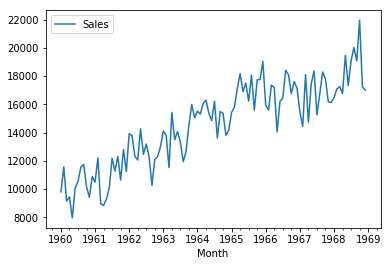

In [36]:
data_deseason_additve.plot()

In [38]:
#Multiplicative decomposition

In [39]:
seasonal_data_mult = seasonal_decompose(data, model = 'multiplicative').seasonal

In [42]:
data_deseason_mult = data / seasonal_data_mult

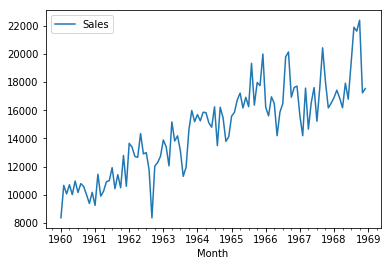

In [43]:
data_deseason_mult.plot()

## Method 1 - Seasonal Indexing 

In [45]:
# We will leave out the last year for testing

In [48]:
data_si = data_year.iloc[:8,].copy()
data_si

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,6550,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456
1961,7237,9374,11837,13784,15926,13821,11143,7975,7610,10015,12759,8816
1962,10677,10947,15200,17010,20900,16205,12143,8997,5568,11474,12256,10583
1963,10862,10965,14405,20379,20128,17816,12268,8642,7962,13932,15936,12628
1964,12267,12470,18944,21259,22015,18581,15175,10306,10792,14752,13754,11738
1965,12181,12965,19990,23125,23541,21247,15189,14767,10895,17130,17697,16611
1966,12674,12760,20249,22135,20677,19933,15388,15113,13401,16135,17562,14720
1967,12225,11608,20985,19692,24081,22114,14220,13434,13598,17187,16119,13713


In [56]:
#Find mean of all years
data_si_yearly_mean = data_si.mean(axis = 1)

In [57]:
data_si_yearly_mean

1960    10186.666667
1961    10858.083333
1962    12663.333333
1963    13826.916667
1964    15171.083333
1965    17111.500000
1966    16728.916667
1967    16581.333333
dtype: float64

In [60]:
#Divide the monthly data by the average of the corresponding year.

data_avg = data_si.div(data_si_yearly_mean.values, axis = 0)

In [61]:
data_avg

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,0.642997,0.856806,1.180563,1.413122,1.431970,1.353829,0.932395,0.809980,0.691983,0.937009,0.919241,0.830105
1961,0.666508,0.863320,1.090156,1.269469,1.466741,1.272877,1.026240,0.734476,0.700860,0.922354,1.175069,0.811930
1962,0.843143,0.864464,1.200316,1.343248,1.650434,1.279679,0.958910,0.710476,0.439695,0.906081,0.967834,0.835720
1963,0.785569,0.793018,1.041809,1.473864,1.455711,1.288501,0.887255,0.625013,0.575833,1.007600,1.152535,0.913291
1964,0.808578,0.821958,1.248691,1.401284,1.451116,1.224764,1.000258,0.679319,0.711353,0.972376,0.906593,0.773709
1965,0.711860,0.757678,1.168220,1.351430,1.375741,1.241680,0.887649,0.862987,0.636706,1.001081,1.034217,0.970751
1966,0.757610,0.762751,1.210419,1.323158,1.236004,1.191530,0.919844,0.903406,0.801068,0.964498,1.049799,0.879914
1967,0.737275,0.700064,1.265580,1.187601,1.452296,1.333668,0.857591,0.810188,0.820079,1.036527,0.972117,0.827014


Compute the average across each year for the values of each month from step 2 in order to obtain the Seasonal Index

In [62]:
data_sindex = data_avg.mean(axis = 0)

In [63]:
data_sindex

Jan    0.744193
Feb    0.802508
Mar    1.175719
Apr    1.345397
May    1.440002
Jun    1.273316
Jul    0.933768
Aug    0.766981
Sep    0.672197
Oct    0.968441
Nov    1.022176
Dec    0.855304
dtype: float64

In [64]:
data_deseason = data_si.div(data_sindex)

In [65]:
data_deseason

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,8801.484817,10875.909975,10228.633271,10699.443705,10129.849155,10830.776685,10171.693402,10757.768579,10486.505728,9856.049691,9160.852952,9886.542299
1961,9724.632919,11680.886813,10067.880594,10245.302677,11059.709168,10854.337218,11933.373297,10397.915940,11321.082223,10341.365915,12482.200215,10307.445235
1962,14347.092121,13640.992953,12928.257585,12643.107845,14513.871758,12726.614182,13004.303325,11730.413757,8283.283287,11847.911383,11990.112535,12373.377147
1963,14595.683677,13663.422648,12252.075692,15147.201339,13977.761279,13991.814765,13138.169578,11267.559818,11844.738063,14386.011974,15590.276874,14764.339659
1964,16483.635763,15538.794384,16112.691559,15801.283343,15288.176399,14592.608338,16251.363168,13437.106166,16054.812004,15232.733896,13455.614214,13723.774067
1965,16368.074283,16155.611002,17002.359811,17188.234504,16347.897371,16686.354306,16266.356188,19253.420023,16208.040843,17688.227470,17313.072906,19421.162977
1966,17030.537186,15900.161695,17222.650516,16452.392248,14359.010829,15654.402992,16479.471264,19704.539636,19936.113386,16660.802699,17181.001660,17210.253388
1967,16427.198762,14464.661204,17848.650357,14636.571410,16722.896928,17367.253689,15228.624992,17515.436080,20229.182137,17747.084970,15769.306785,16032.894341


In [68]:
data_lr = pd.DataFrame(data_deseason.values.reshape(-1,1), columns=['value'])

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(1, 97).reshape(-1, 1), data_lr.value.values.reshape(-1, 1) )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
import numpy as np

In [73]:
pred = pd.DataFrame(model.predict(np.arange(97, 109).reshape(-1, 1)), columns=['Trend values'], index=cols)
#pred['Regression equations'] = pred['Trend values'].apply(lambda x: str(np.round(model.coef_[0][0], 2)) + ' * '+ str(np.round(x, 2)) + ' + ' + str(np.round(model.intercept_[0], 2)))
pred

,Trend values
Jan,18495.715398
Feb,18585.274276
Mar,18674.833155
Apr,18764.392033
May,18853.950912
Jun,18943.509790
Jul,19033.068669
Aug,19122.627547
Sep,19212.186426
Oct,19301.745304


In [75]:
data_year

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,6550,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456
1961,7237,9374,11837,13784,15926,13821,11143,7975,7610,10015,12759,8816
1962,10677,10947,15200,17010,20900,16205,12143,8997,5568,11474,12256,10583
1963,10862,10965,14405,20379,20128,17816,12268,8642,7962,13932,15936,12628
1964,12267,12470,18944,21259,22015,18581,15175,10306,10792,14752,13754,11738
1965,12181,12965,19990,23125,23541,21247,15189,14767,10895,17130,17697,16611
1966,12674,12760,20249,22135,20677,19933,15388,15113,13401,16135,17562,14720
1967,12225,11608,20985,19692,24081,22114,14220,13434,13598,17187,16119,13713
1968,13210,14251,20139,21725,26099,21084,18024,16722,14385,21342,17180,14577


In [77]:
data_train = data.iloc[:96,].copy()

In [78]:
data_test = data.iloc[96:,].copy()

In [79]:
from statsmodels.tsa.arima_model

,Sales
Month,
1968-01-01,13210
1968-02-01,14251
1968-03-01,20139
1968-04-01,21725
1968-05-01,26099
1968-06-01,21084
1968-07-01,18024
1968-08-01,16722
1968-09-01,14385
